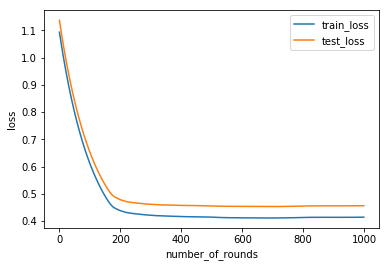

acc: 0.865942028986
acc: 0.847826086957


In [2]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

# liner classification

def get_data(path):
    data = ds.load_svmlight_file("/Users/yj/文件/数据集/australian_scale")
    return data[0], data[1]

# 损失函数
def loss(W,b,X,Y,C=1):

    N,dim = X.shape
    hinge_loss = 0
    for i in range(N):
        t = 1 - Y[i]*( W.dot(X[i].T) + b  )
        hinge_loss += max( 0 , t)
    data_loss = 0.5*np.sum( W **2 ) + C * hinge_loss
    data_loss /= N
    return data_loss 

# 梯度函数
def grad(W,b,X,Y,C=0.9):

    N,dim = X.shape
    dW = np.zeros(dim).T
    db = 0
    for i in range(N):
        if (1 - Y[i]*( W.dot(X[i].T) + b  ) ) >=0:
            dW += W.T - C * (Y[i] * X[i]).T
            db += - C * Y[i]
        else:
            dW += W
    return dW, db

def predict(X,y,W,b):
    X = np.matrix(X)
    W = np.matrix(W)
    b = np.matrix(b)
    pred = X * (W.transpose() )
    pred_y = list(map(lambda x: 1 if x>0 else -1,pred.A))
    acc = (pred_y==y).sum() / X.shape[0]
    print('acc:',acc)

def train(X_train,y_train,X_test,y_test,step=0.01,iterNum=1000):

    N,dim = X_train.shape
    # 初始化参数
    W = np.zeros(dim)
    b = 1

    loss_train_history = []
    loss_test_history = []
    for i in range(iterNum):
        W += -step * ( grad(W,b,X_train,y_train)[0] ) / N
        b += -step * ( grad(W,b,X_train,y_train)[1] ) / N
        # 计算 记录误差
        L_train = loss(W,b,X_train,y_train)
        loss_train_history.append(L_train)

        L_test = loss(W,b,X_test,y_test)
        loss_test_history.append(L_test)

    # 画图
    plt.plot(np.arange(iterNum),loss_train_history, label='train_loss')
    plt.plot(np.arange(iterNum),loss_test_history, label='test_loss')
    plt.legend(loc=1)
    plt.xlabel('number_of_rounds')
    plt.ylabel('loss')
    plt.show()
    predict(X_train,y_train,W,b)
    predict(X_test,y_test,W,b)


X,y = get_data('australian_scale.txt')
X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=215)
train(X_train,y_train,X_test,y_test)